In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('archive/bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [4]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [5]:
df.isna().value_counts()

state  account length  area code  phone number  international plan  voice mail plan  number vmail messages  total day minutes  total day calls  total day charge  total eve minutes  total eve calls  total eve charge  total night minutes  total night calls  total night charge  total intl minutes  total intl calls  total intl charge  customer service calls  churn
False  False           False      False         False               False            False                  False              False            False             False              False            False             False                False              False               False               False             False              False                   False    3333
dtype: int64

## Data Cleaning


In [6]:
df.shape

(3333, 21)

- Number of Rows (Observations): There are 3333 rows in the DataFrame.
- Number of Columns (Variables): There are 21 columns (or variables) in the DataFrame.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [8]:

df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no null numbers.

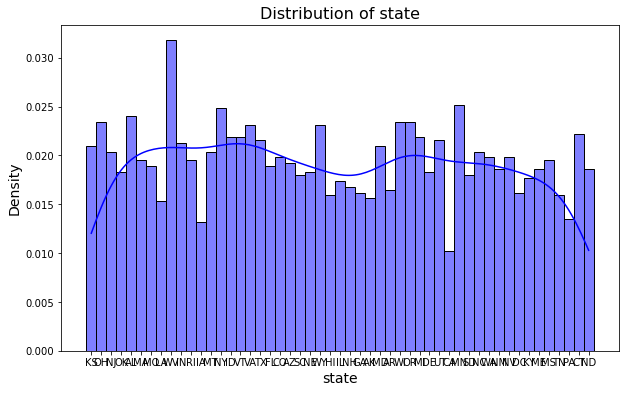

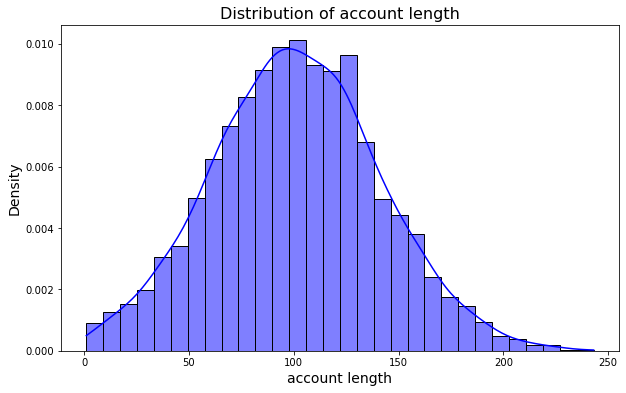

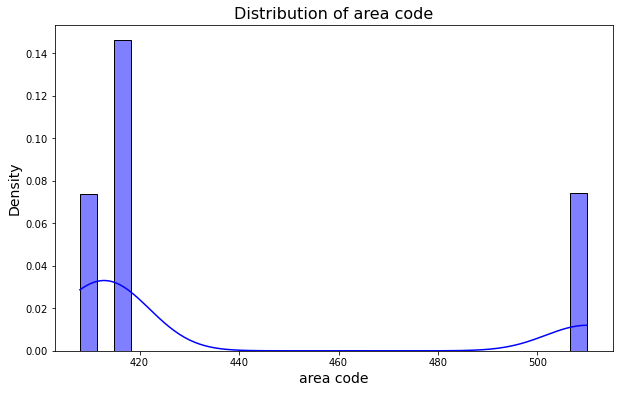

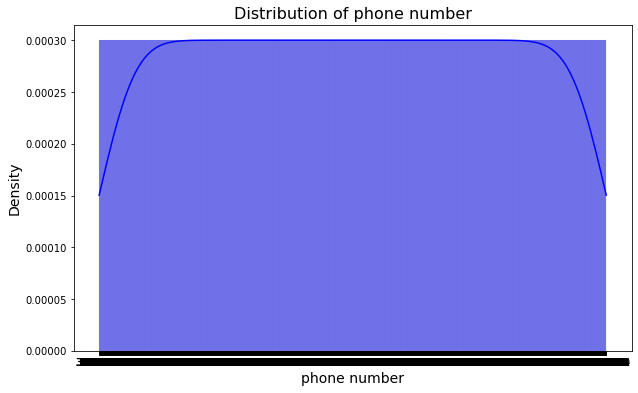

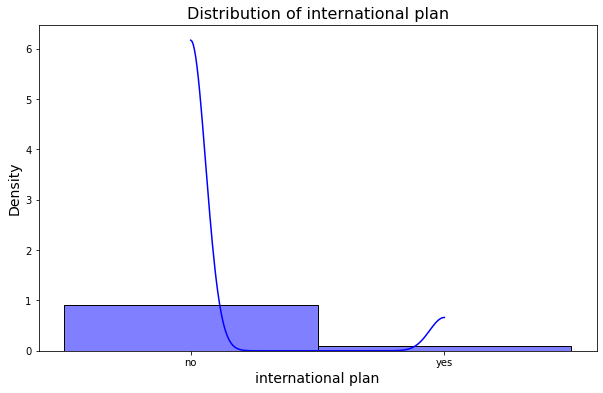

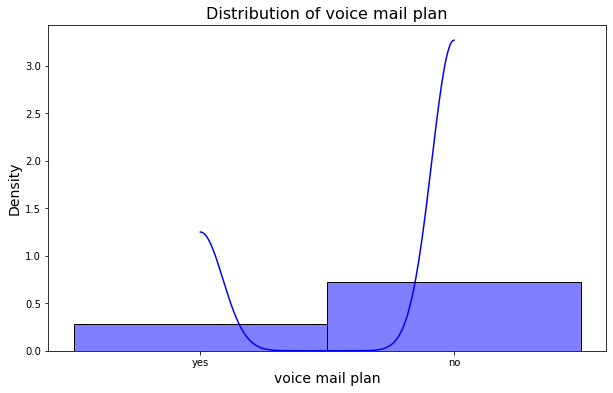

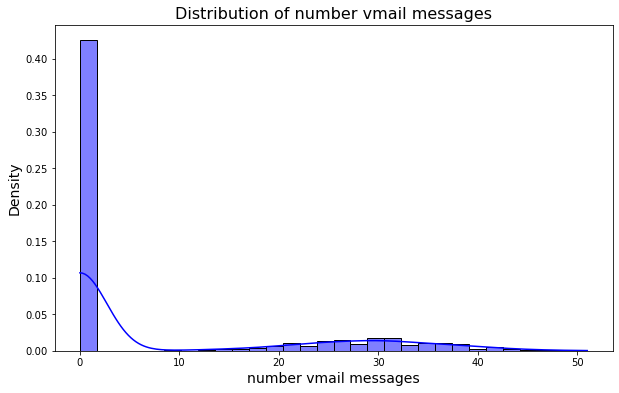

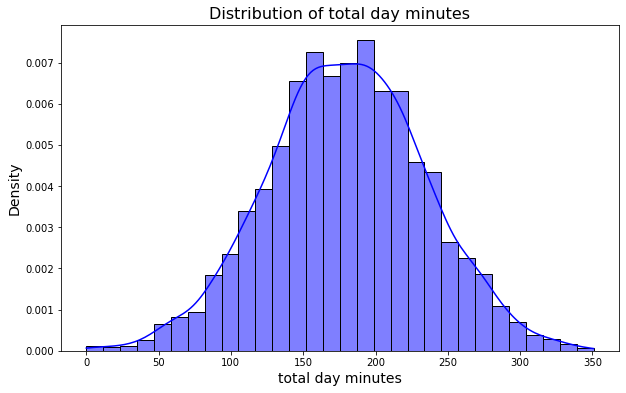

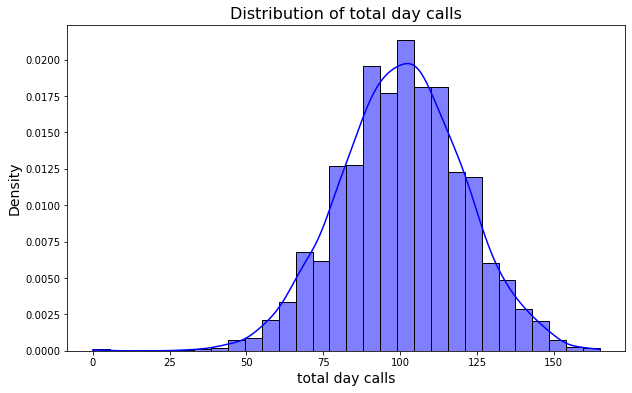

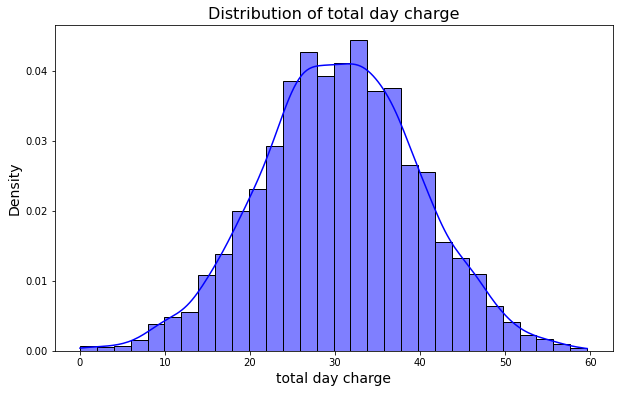

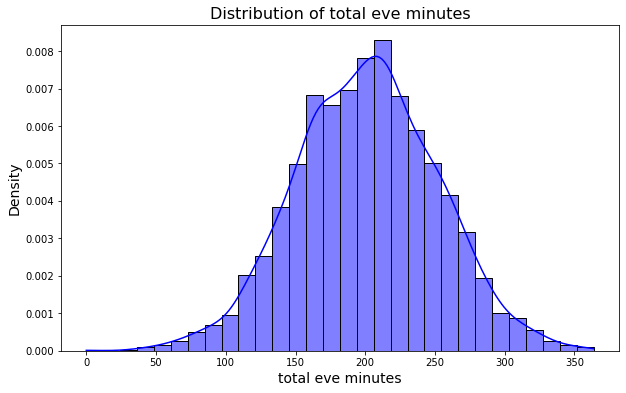

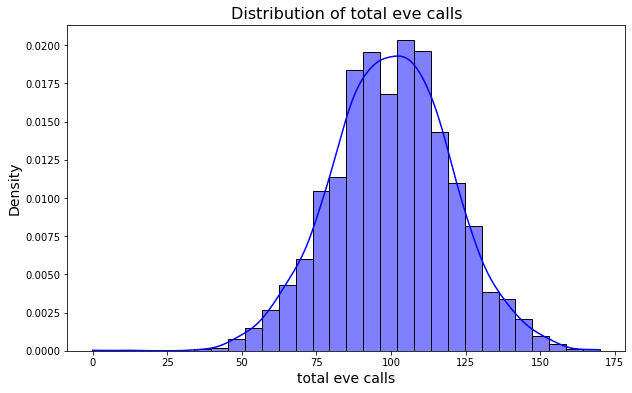

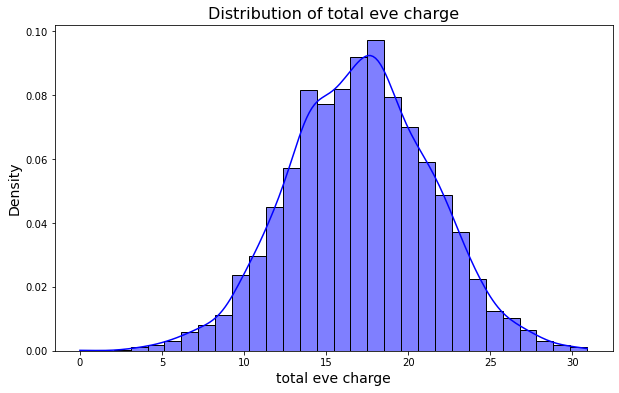

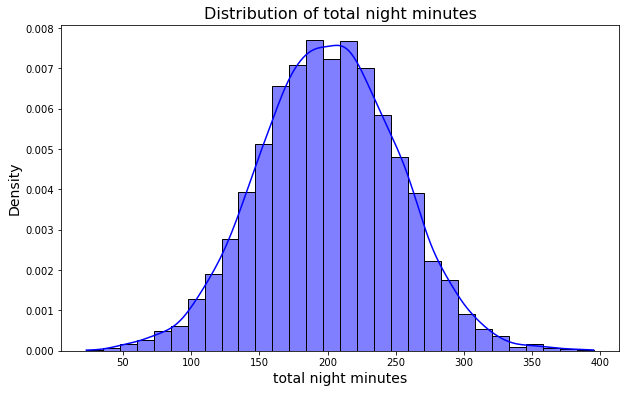

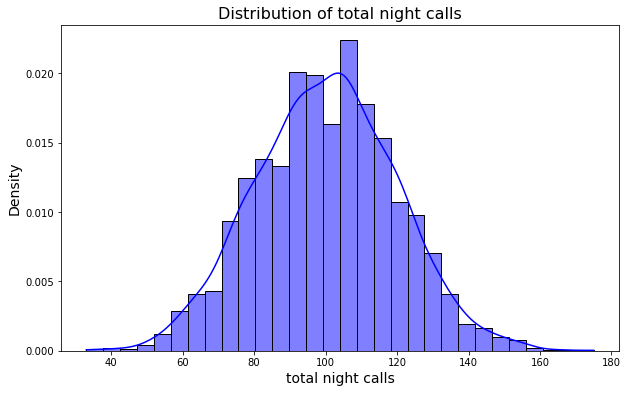

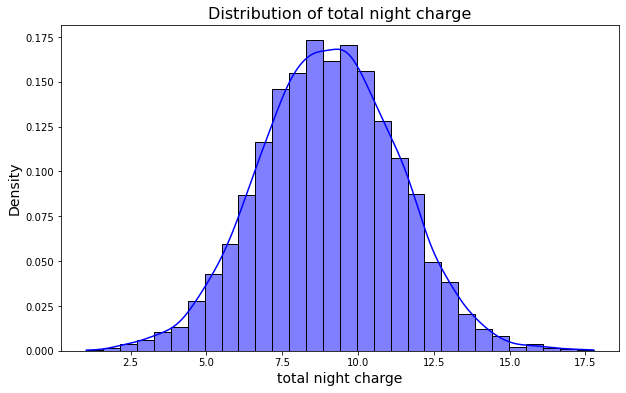

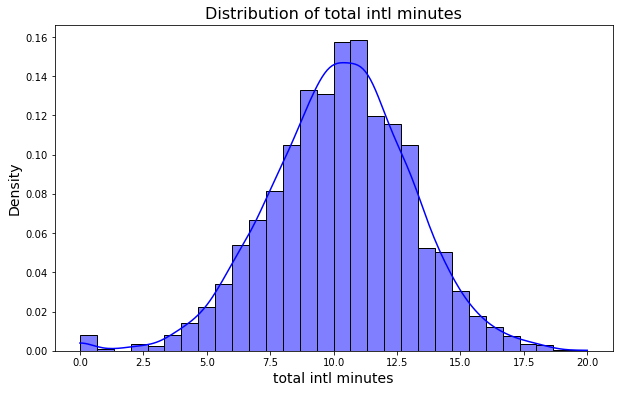

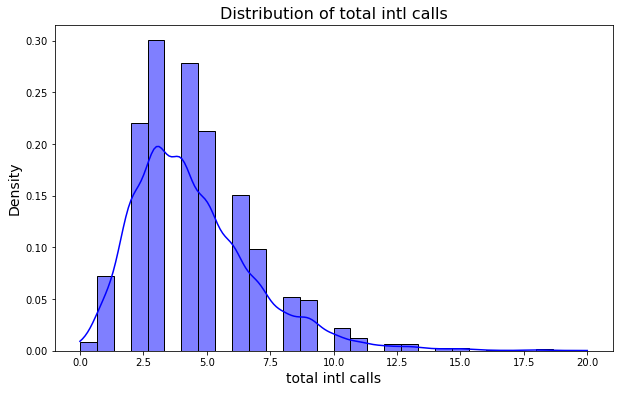

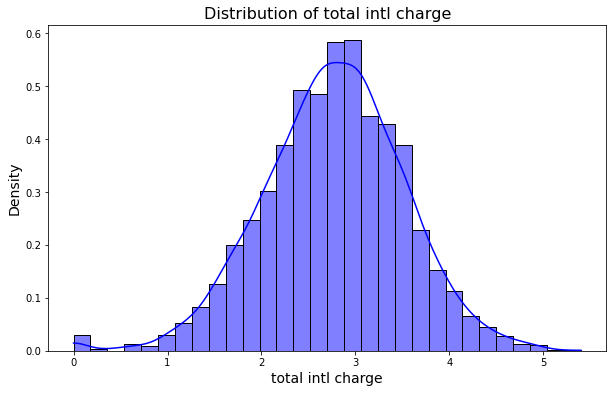

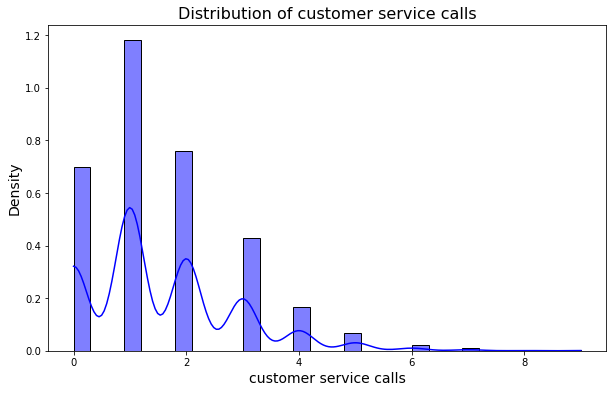

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


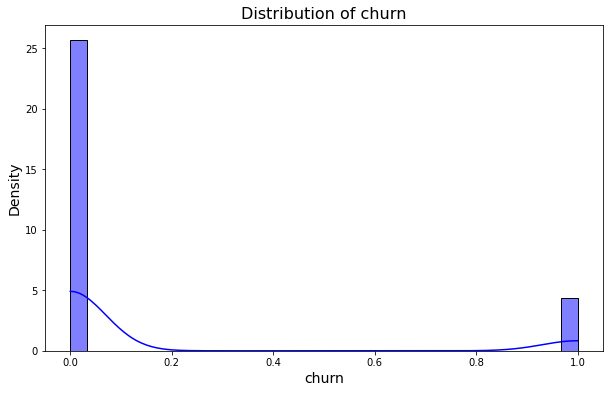

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'feature_column' is the column you want to check
def plot_distribution(df, feature_column):
    plt.figure(figsize=(10, 6))
    
    # Histogram
    sns.histplot(df[feature_column], kde=True, color='blue', stat='density', bins=30)
    
    # Labels and title
    plt.title(f'Distribution of {feature_column}', fontsize=16)
    plt.xlabel(f'{feature_column}', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.show()

# Example usage for a column
for x in range(len(df.columns)):
    plot_distribution(df, df.columns[x])


we shall use minmax scaler

In [10]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [11]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [12]:
df['state'].sample(n= 10)

1118    MA
1735    CO
1290    CA
3139    AL
2795    MI
1421    MN
1660    SD
1492    NY
228     VA
1316    MT
Name: state, dtype: object

In [13]:
df['state'].value_counts()

WV    106
MN     84
NY     83
AL     80
OH     78
OR     78
WI     78
WY     77
VA     77
CT     74
ID     73
MI     73
VT     73
UT     72
TX     72
IN     71
MD     70
KS     70
MT     68
NC     68
NJ     68
CO     66
WA     66
NV     66
RI     65
MS     65
MA     65
AZ     64
MO     63
FL     63
ME     62
ND     62
NM     62
DE     61
OK     61
NE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [15]:
df['voice mail plan'].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

In [16]:
df['international plan'].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

drop unnecessary columns

In [17]:
df = df.drop(columns = ["phone number", "area code", "account length"], axis =1)

In [18]:
df['voice mail plan'] = df['voice mail plan'].replace({'yes': 1, 'no': 0})
df['international plan'] = df['international plan'].replace({'yes': 1, 'no': 0})

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   international plan      3333 non-null   int64  
 2   voice mail plan         3333 non-null   int64  
 3   number vmail messages   3333 non-null   int64  
 4   total day minutes       3333 non-null   float64
 5   total day calls         3333 non-null   int64  
 6   total day charge        3333 non-null   float64
 7   total eve minutes       3333 non-null   float64
 8   total eve calls         3333 non-null   int64  
 9   total eve charge        3333 non-null   float64
 10  total night minutes     3333 non-null   float64
 11  total night calls       3333 non-null   int64  
 12  total night charge      3333 non-null   float64
 13  total intl minutes      3333 non-null   float64
 14  total intl calls        3333 non-null   

one hot encode the state


Defining the features and the target


In [20]:
y = df['churn']
X= df.drop('churn', axis = 1)

Test train split

In [21]:
# test train split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [22]:
y_train.value_counts()

False    2284
True      382
Name: churn, dtype: int64

There are class imbalance problems, as expected, but first let's one hot encode

In [23]:
from sklearn.preprocessing import OneHotEncoder

In [24]:
ohe = OneHotEncoder(drop = 'first',handle_unknown="ignore", sparse_output=False)

In [25]:
X_train_categorical = X_train['state']
X_train_categorical = X_train_categorical.values.reshape(-1, 1)
X_train_categorical_ohe=  ohe.fit_transform(X_train_categorical)

X_train_encoded_categorical = pd.DataFrame(
    X_train_categorical_ohe,
    columns=ohe.get_feature_names_out(['state'])
)
X_train_encoded_categorical

,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
X_train_numeric = X_train.drop("state", axis =1)

In [27]:
X_train_numeric.head()

,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
817,0,0,0,95.5,92,16.24,163.7,63,13.91,264.2,118,11.89,6.6,6,1.78,2
1373,0,0,0,112.0,105,19.04,193.7,110,16.46,208.9,93,9.40,4.1,4,1.11,4
679,1,0,0,222.4,78,37.81,327.0,111,27.80,208.0,104,9.36,8.7,9,2.35,1
56,0,0,0,126.9,98,21.57,180.0,62,15.30,140.8,128,6.34,8.0,2,2.16,1
1993,0,0,0,216.3,96,36.77,266.3,77,22.64,214.0,110,9.63,4.5,3,1.22,0


MinMax Scaling


In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [29]:
scaler.fit(X_train_numeric)
X_train_numeric_scaled = pd.DataFrame(
    scaler.transform(X_train_numeric),
    # index is important to ensure we can concatenate with other columns
    index=X_train_numeric.index,
    columns=X_train_numeric.columns
)
X_train_numeric_scaled

,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
817,0.0,0.0,0.000000,0.266801,0.459259,0.266892,0.450096,0.370588,0.450016,0.648198,0.598592,0.648536,0.330,0.315789,0.329630,0.222222
1373,0.0,0.0,0.000000,0.314187,0.555556,0.314189,0.532582,0.647059,0.532514,0.499462,0.422535,0.499701,0.205,0.210526,0.205556,0.444444
679,1.0,0.0,0.000000,0.631246,0.355556,0.631250,0.899093,0.652941,0.899385,0.497041,0.500000,0.497310,0.435,0.473684,0.435185,0.111111
56,0.0,0.0,0.000000,0.356979,0.503704,0.356926,0.494913,0.364706,0.494985,0.316299,0.669014,0.316796,0.400,0.105263,0.400000,0.111111
1993,0.0,0.0,0.000000,0.613728,0.488889,0.613682,0.732197,0.452941,0.732449,0.513179,0.542254,0.513449,0.225,0.157895,0.225926,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.0,0.0,0.000000,0.780586,0.666667,0.780574,0.546054,0.482353,0.546102,0.370091,0.204225,0.370592,0.300,0.157895,0.300000,0.111111
1130,0.0,0.0,0.000000,0.093337,0.237037,0.093412,0.497113,0.523529,0.497250,0.614309,0.176056,0.614465,0.635,0.105263,0.635185,0.111111
1294,0.0,0.0,0.000000,0.244113,0.340741,0.244088,0.720374,0.652941,0.720479,0.434104,0.647887,0.434549,0.460,0.263158,0.459259,0.111111
860,0.0,0.0,0.000000,0.507180,0.600000,0.507095,0.481716,0.764706,0.481721,0.552448,0.415493,0.552899,0.495,0.315789,0.494444,0.222222


In [30]:
# Reset the index of both DataFrames
X_train_numeric_scaled = X_train_numeric_scaled.reset_index(drop=True)
X_train_encoded_categorical = X_train_encoded_categorical.reset_index(drop=True)

In [31]:
X_train_full = pd.concat([X_train_encoded_categorical, X_train_numeric_scaled], axis=1)
X_train_full

,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,...,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.450096,0.370588,0.450016,0.648198,0.598592,0.648536,0.330,0.315789,0.329630,0.222222
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.532582,0.647059,0.532514,0.499462,0.422535,0.499701,0.205,0.210526,0.205556,0.444444
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.899093,0.652941,0.899385,0.497041,0.500000,0.497310,0.435,0.473684,0.435185,0.111111
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.494913,0.364706,0.494985,0.316299,0.669014,0.316796,0.400,0.105263,0.400000,0.111111
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.732197,0.452941,0.732449,0.513179,0.542254,0.513449,0.225,0.157895,0.225926,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.546054,0.482353,0.546102,0.370091,0.204225,0.370592,0.300,0.157895,0.300000,0.111111
2662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.497113,0.523529,0.497250,0.614309,0.176056,0.614465,0.635,0.105263,0.635185,0.111111
2663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.720374,0.652941,0.720479,0.434104,0.647887,0.434549,0.460,0.263158,0.459259,0.111111
2664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.481716,0.764706,0.481721,0.552448,0.415493,0.552899,0.495,0.315789,0.494444,0.222222


let's do the same for test set


In [32]:
X_test_categorical = X_test['state']
X_test_categorical = X_test_categorical.values.reshape(-1, 1)
X_test_categorical_ohe=  ohe.fit_transform(X_test_categorical)

X_test_encoded_categorical = pd.DataFrame(
    X_test_categorical_ohe,
    columns=ohe.get_feature_names_out(['state'])
)
X_test_encoded_categorical

#

X_test_numeric = X_test.drop("state", axis =1)

#


scaler.fit(X_test_numeric)
X_test_numeric_scaled = pd.DataFrame(
    scaler.transform(X_test_numeric),
    # index is important to ensure we can concatenate with other columns
    index=X_test_numeric.index,
    columns=X_test_numeric.columns
)
X_test_numeric_scaled

# Reset the index of both DataFrames
X_test_numeric_scaled = X_test_numeric_scaled.reset_index(drop=True)
X_test_encoded_categorical = X_test_encoded_categorical.reset_index(drop=True)


X_test_full = pd.concat([X_test_encoded_categorical, X_test_numeric_scaled], axis=1)
X_test_full

,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,...,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.965495,0.500000,0.965478,0.449691,0.669231,0.449246,0.714286,0.15,0.715686,0.142857
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.600451,0.655172,0.600531,0.446605,0.807692,0.446502,0.677249,0.30,0.678431,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.414060,0.706897,0.414264,0.380864,0.400000,0.380658,0.359788,0.05,0.360784,0.571429
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.557562,0.370690,0.557663,0.347222,0.592308,0.347051,0.539683,0.10,0.539216,0.142857
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.623992,0.215517,0.624052,0.567901,0.423077,0.567901,0.529101,0.35,0.529412,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.586262,0.318966,0.586495,0.470370,0.376923,0.469822,0.449735,0.25,0.450980,0.285714
663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.497259,0.603448,0.497344,0.459877,0.615385,0.459534,0.433862,0.10,0.433333,0.428571
664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.416962,0.681034,0.416920,0.538889,0.400000,0.538409,0.523810,0.15,0.523529,0.142857
665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.566269,0.681034,0.566388,0.465123,0.600000,0.465021,0.222222,0.35,0.221569,0.428571


# Modeling


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc

LogisticRegression(C=1e+20, fit_intercept=False)
AUC for None: 0.7577406150509044
-------------------------------------------------------------------------------------
LogisticRegression(C=1e+20, class_weight='balanced', fit_intercept=False)
AUC for Balanced: 0.7912570408984362
-------------------------------------------------------------------------------------
LogisticRegression(C=1e+20, class_weight={0: 1, 1: 2}, fit_intercept=False)
AUC for 2 to 1: 0.7725221285379422
-------------------------------------------------------------------------------------
LogisticRegression(C=1e+20, class_weight={0: 1, 1: 10}, fit_intercept=False)


/home/leo/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/leo/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

AUC for 10 to 1: 0.7967673092397578
-------------------------------------------------------------------------------------
LogisticRegression(C=1e+20, class_weight={0: 1, 1: 100}, fit_intercept=False)
AUC for 100 to 1: 0.80154287513557
-------------------------------------------------------------------------------------


/home/leo/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/leo/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

LogisticRegression(C=1e+20, class_weight={0: 1, 1: 1000}, fit_intercept=False)
AUC for 1000 to 1: 0.8014029318126158
-------------------------------------------------------------------------------------


/home/leo/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


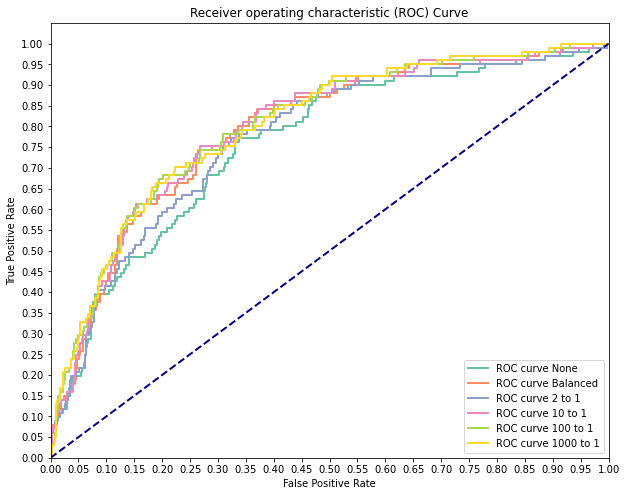

In [34]:
# Now let's compare a few different regularization performances on the dataset:
weights = [None, 'balanced', {1:2, 0:1}, {1:10, 0:1}, {1:100, 0:1}, {1:1000, 0:1}]
names = ['None', 'Balanced', '2 to 1', '10 to 1', '100 to 1', '1000 to 1']
colors = sns.color_palette('Set2')

plt.figure(figsize=(10,8))

for n, weight in enumerate(weights):
    # Fit a model
    logreg = LogisticRegression(fit_intercept=False, C=1e20, class_weight=weight, solver='lbfgs')
    model_log = logreg.fit(X_train_full, y_train)
    print(model_log)

    # Predict
    y_hat_test = logreg.predict(X_test_full)

    y_score = logreg.fit(X_train_full, y_train).decision_function(X_test_full)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    print('-------------------------------------------------------------------------------------')
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve {}'.format(names[n]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [35]:
#

using SMOTE

In [37]:
import sklearn
from imblearn.over_sampling import SMOTE


In [38]:
# Previous original class distribution
print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_full, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

False    2850
True      483
Name: churn, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

True     2284
False    2284
Name: churn, dtype: int64


/home/leo/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1e+20, fit_intercept=False)
AUC for 0.25: 0.7653850190672778
-------------------------------------------------------------------------------------
LogisticRegression(C=1e+20, fit_intercept=False)
AUC for 0.33: 0.7563586747367316
-------------------------------------------------------------------------------------


/home/leo/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1e+20, fit_intercept=False)
AUC for 0.5: 0.7770003148724766
-------------------------------------------------------------------------------------


/home/leo/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1e+20, fit_intercept=False)
AUC for 0.7: 0.7818808382605046
-------------------------------------------------------------------------------------


/home/leo/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1e+20, fit_intercept=False)
AUC for even: 0.785781758387853
-------------------------------------------------------------------------------------


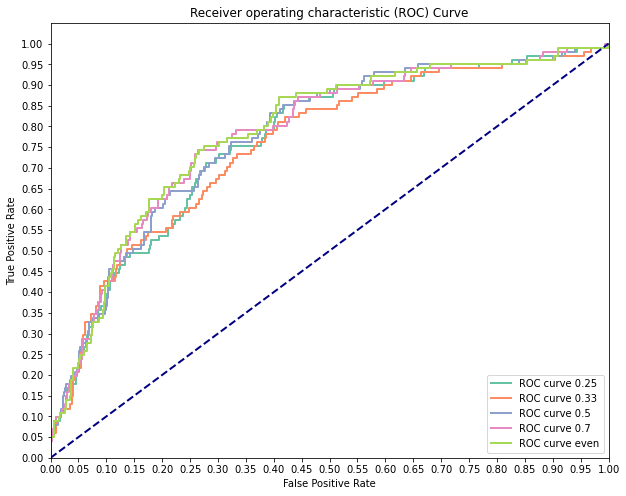

In [ ]:
# Now let's compare a few different ratios of minority class to majority class
ratios = [ 0.25, 0.33, 0.5, 0.7, 1]
names = [ '0.25', '0.33','0.5','0.7','even']
colors = sns.color_palette('Set2')

plt.figure(figsize=(10, 8))

for n, ratio in enumerate(ratios):
    # Fit a model
    smote = SMOTE(sampling_strategy=ratio)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_full, y_train) 
    logreg = LogisticRegression(fit_intercept=False, C=1e20, solver ='lbfgs')
    model_log = logreg.fit(X_train_resampled, y_train_resampled)
    print(model_log)

    # Predict
    y_hat_test = logreg.predict(X_test_full)

    y_score = logreg.decision_function(X_test_full)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    print('-------------------------------------------------------------------------------------')
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve {}'.format(names[n]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# settling on good one 

In [ ]:
# Fit a model
logreg = LogisticRegression(fit_intercept=False, C=1e20, class_weight='balanced', solver='lbfgs')
model_log = logreg.fit(X_train_full, y_train)
print(model_log)

# Predict
y_hat_test = logreg.predict(X_test_full)

LogisticRegression(C=1e+20, class_weight='balanced', fit_intercept=False)


In [39]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
model_accuracy = accuracy_score(y_true= y_test, y_pred= y_hat_test)
model_recall = recall_score(y_true= y_test, y_pred= y_hat_test)
model_precision = precision_score(y_true= y_test, y_pred= y_hat_test)
model_f1 = f1_score(y_true= y_test, y_pred= y_hat_test)

In [40]:
print(f"""
Accuracy
Fitted Model: {model_accuracy:1.3f}
Recall
Fitted Model: {model_recall:1.3f}
Precision
 Fitted Model: {model_precision:1.3f}
F1 Score
 Fitted Model: {model_f1:1.3f}
""")


Accuracy
Fitted Model: 0.169
Recall
Fitted Model: 1.000
Precision
 Fitted Model: 0.154
F1 Score
 Fitted Model: 0.267



In [ ]:
smote = SMOTE(sampling_strategy=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_full, y_train) 
# Fit a model
logreg = LogisticRegression(fit_intercept=False, C=1e20, solver='lbfgs')
model_log = logreg.fit(X_train_full, y_train)
print(model_log)

# Predict
y_hat_test = logreg.predict(X_test_full)
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
model_accuracy = accuracy_score(y_true= y_test, y_pred= y_hat_test)
model_recall = recall_score(y_true= y_test, y_pred= y_hat_test)
model_precision = precision_score(y_true= y_test, y_pred= y_hat_test)
model_f1 = f1_score(y_true= y_test, y_pred= y_hat_test)

print(f"""
Accuracy
Fitted Model: {model_accuracy:1.3f}
Recall
Fitted Model: {model_recall:1.3f}
Precision
 Fitted Model: {model_precision:1.3f}
F1 Score
 Fitted Model: {model_f1:1.3f}
""")

LogisticRegression(C=1e+20, fit_intercept=False)

Accuracy
Fitted Model: 0.834
Recall
Fitted Model: 0.257
Precision
 Fitted Model: 0.419
F1 Score
 Fitted Model: 0.319



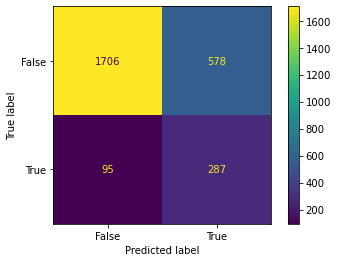

In [ ]:

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.dummy import DummyClassifier

ConfusionMatrixDisplay.from_estimator(estimator=model_log, X=X_train_full, y=y_train);

In [41]:
from sklearn.metrics import roc_auc_score


# Calculate AUC score
auc_score = roc_auc_score(y_test, y_hat_test)

print(f'AUC Score: {auc_score}')


AUC Score: 0.510600706713781
